In [ ]:
import pandas as pd
import numpy as np

users = pd.read_csv('users_plot.csv')
users.head()

,username,id,clean_following,following_count,avg_leaning,following leaning
0,1980srock,7.188956e+17,"['tweettruth2me', 'bennyjohnson', 'stillgray',...",8,-0.377271,-0.288093
1,marylou_quayle,7.556195e+17,"['stillgray', 'mtracey', 'caitoz', 'cat_barnes...",20,-0.805080,-0.264663
2,hemingquay,7.876231e+08,"['prolifejewess', 'just_mindy', 'davidharsanyi...",14,-0.163700,-0.334355
3,Vandalay_Inc,8.279382e+17,"['kittysundae', 'academic_la', 'thedailybeast'...",13,-0.480517,-0.108269
4,DTorstensond,1.293988e+18,"['nycforabortion', 'taliaotg', 'ybarrap', 'nan...",60,0.531656,0.098835


In [ ]:
def parse_following_string(s):
    s = s[1:len(s) - 2]
    ids = []
    for id in s.split(', '):
        if id != '':
            ids.append(id.strip("''"))
    return ids

In [ ]:
users['clean_following'] = users['clean_following'].apply(lambda x: parse_following_string(x))
users.head()

,username,id,clean_following,following_count,avg_leaning,following leaning
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835


In [ ]:
net = users[['username','clean_following']]
net = net.explode('clean_following', ignore_index=True)
net.head()

,username,clean_following
0,1980srock,tweettruth2me
1,1980srock,bennyjohnson
2,1980srock,stillgray
3,1980srock,theblaze
4,1980srock,benshapiro


In [ ]:
net.rename(columns={'clean_following':'following'},inplace=True)

In [ ]:
len(net)

164729

In [ ]:
net.to_csv('following_net.csv',index=False)

### Network

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
userset = set(pd.concat([net.username,net.following]))
len(userset)

9912

In [ ]:
network = nx.DiGraph()
network.add_nodes_from(userset)

edge = [(net['username'][i],net['following'][i]) for i in range(len(net))]
network.add_edges_from(edge)

In [ ]:
indegree = dict(network.in_degree())

users2 = users

users2['indegree'] = users2['username'].map(indegree)
users2.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093,6
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663,17
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355,42
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269,0
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835,0


In [ ]:
users2.sort_values(by=['indegree'],ascending=False)[:10]

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree
4368,benshapiro,1.799504e+07,"[wil_da_beast630, xan_desanctis, janecoaston, ...",10,-0.614267,-0.584709,3498
3482,ewarren,3.576069e+08,"[hrw, amprog, thenation, rollcall, politico, e...",8,0.266942,0.390595,2180
2522,bennyjohnson,1.521219e+07,"[smashbaals, townhallcom, therecount, newsinve...",24,-0.614400,-0.270611,2101
2858,kylegriffin1,3.287109e+07,"[postpolitics, rickhasen, joshtpm, jackmjenkin...",18,0.236067,0.087020,1782
2583,politico,9.300262e+06,"[nytpolitics, meganmesserly, lisakashinsky, pr...",14,0.810250,0.090488,1747
8639,stillgray,1.610658e+07,"[davidmweissman, mtracey, derekahunter, katfan...",22,-0.012900,-0.233651,1315
1328,conservmillen,7.043913e+17,"[stillgray, smashbaals, sourpatchlyds, lyndsey...",18,-0.706367,-0.256588,1290
1053,guardian,8.781841e+07,"[sahilkapur, crikey_news, theipaper, politico,...",6,0.029633,0.008787,1278
9239,davidfrum,1.868691e+07,"[michaelcdeibert, hrw, sahilkapur, bluestein, ...",13,-0.619933,-0.034630,1226
2039,theblaze,1.077465e+07,"[michaelmalice, kylenabecker, mrddmia, politic...",12,-0.081580,-0.306594,1173


In [ ]:
import pycombo

partition, modularity = pycombo.execute(network, return_modularity=True, random_seed=42)
print(f'Partition modularity: {modularity:.5f}')

Partition modularity: 0.47802


In [ ]:
len(set(partition.values()))

5

In [ ]:
users2['community'] = users2['username'].map(partition)
users2.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree,community
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093,6,1
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663,17,1
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355,42,1
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269,0,2
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835,0,2


In [ ]:
users2['community'].value_counts()

1    4595
2    2997
0    1833
4      34
3      27
Name: community, dtype: int64

### Visualization

In [ ]:
#for the purpose of visualization, only focus on users with indegree >= 100
vis_user = list(users2['username'].loc[users2['indegree']>=100])
vis_net = network.subgraph(vis_user)

In [ ]:
len(vis_net)

307

In [ ]:
partition2, modularity2 = pycombo.execute(vis_net, return_modularity=True, random_seed=42)
print(f'Partition modularity: {modularity2:.5f}')

Partition modularity: 0.43099


In [ ]:
len(set(partition2.values()))

3

 ...]

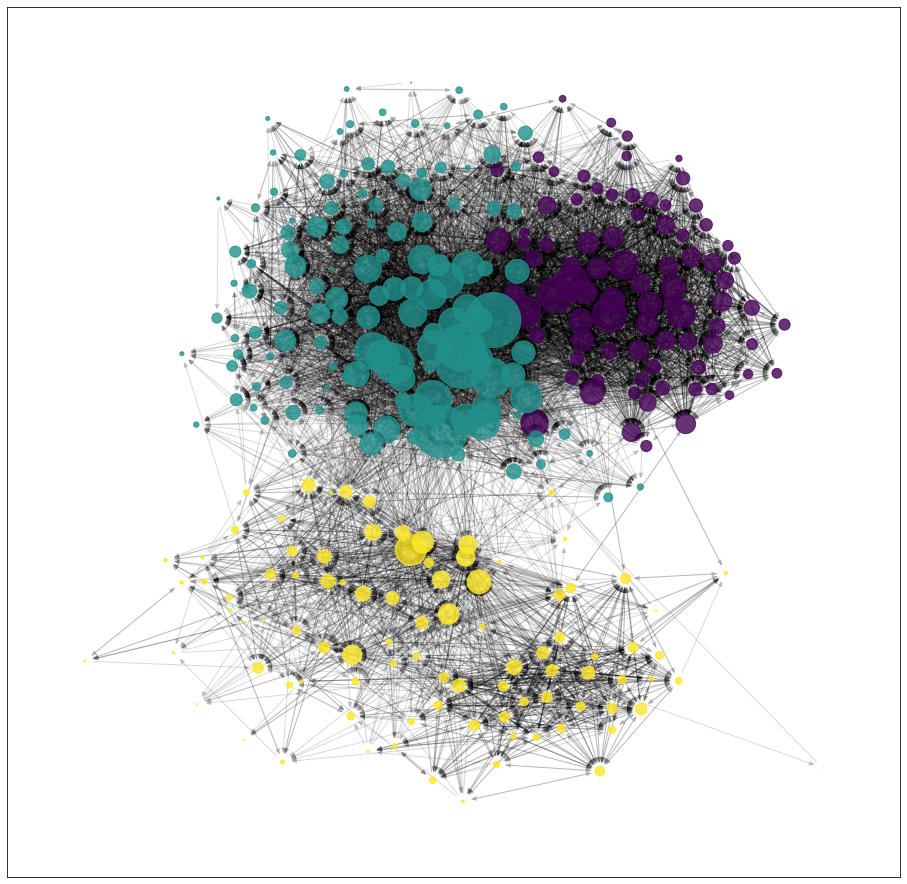

In [ ]:
np.random.seed(2023)
plt.figure(figsize = (16,16))
pos = nx.kamada_kawai_layout(vis_net)

nx.draw_networkx_nodes(vis_net,pos=pos,alpha=0.8,node_color=list(partition2.values()),node_size=0.2*np.array(list(dict(vis_net.in_degree()).values()))**2)
nx.draw_networkx_edges(vis_net,pos=pos,alpha=0.15)
#nx.draw(vis_net,pos=pos,with_labels=True,node_color=list(partition2.values()),alpha=edge_alpha,node_size=0.2*np.array(list(dict(vis_net.in_degree()).values()))**2)

### Indegree vs out-communities

cross communities

In [ ]:
net['community1'] = net['username'].map(partition)
net['community2'] = net['following'].map(partition)
net.head()

,username,following,community1,community2
0,1980srock,tweettruth2me,1,1
1,1980srock,bennyjohnson,1,1
2,1980srock,stillgray,1,1
3,1980srock,theblaze,1,1
4,1980srock,benshapiro,1,1


In [ ]:
net['cross'] = None

net['cross'].loc[net['community1']==net['community2']] = 0
net['cross'].loc[net['community1']!=net['community2']] = 1


/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_51776/2641261404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net['cross'].loc[net['community1']==net['community2']] = 0
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_51776/2641261404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net['cross'].loc[net['community1']!=net['community2']] = 1


In [ ]:
cross_cnts = net.groupby('username').agg({'cross':'sum'})
cross_cnts.head()

,cross
username,
007mss,0
00_JR_00,0
02percent_,0
03lefty,1
0513White,0


In [ ]:
users2['cross_edges'] = users2['username'].map(cross_cnts.to_dict()['cross'])
users2.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree,community,cross_edges
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093,6,1,0
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663,17,1,2
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355,42,1,2
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269,0,2,6
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835,0,2,25


<AxesSubplot:xlabel='indegree', ylabel='cross_edges'>

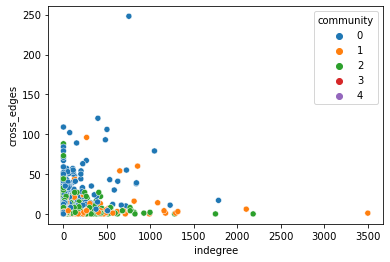

In [ ]:
import seaborn as sns
sns.scatterplot(data=users2, x="indegree", y="cross_edges", hue="community",palette="tab10")

In [ ]:
from scipy import stats

corr, p = stats.spearmanr(users2['indegree'],users2['cross_edges'])
print(corr)
print(p)

0.1408930569871787
2.949598371336668e-43


/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='indegree', ylabel='cross_edges'>

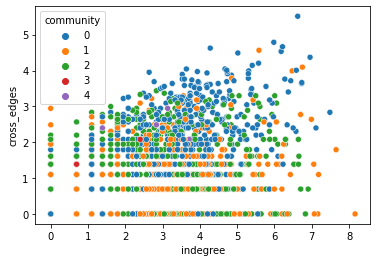

In [ ]:
sns.scatterplot(np.log(users2['indegree']),np.log(users2['cross_edges']), hue=users2['community'], palette="tab10")

In [ ]:
corr, p = stats.spearmanr(np.log(users2['indegree']),np.log(users2['cross_edges']))
print(corr)
print(p)

0.1408930569871787
2.949598371336668e-43


/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


cross stance

In [ ]:
users2['stance'] = users2['avg_leaning'].apply(lambda x: 1 if x>0 else(-1 if x < 0 else 0) )

In [ ]:
user_stance = users2[['username','stance']].set_index('username')

In [ ]:
net['stance1'] = net['username'].map(user_stance.to_dict()['stance'])
net['stance2'] = net['following'].map(user_stance.to_dict()['stance'])
net.head()

,username,following,community1,community2,cross,stance1,stance2
0,1980srock,tweettruth2me,1,1,0,-1,-1.0
1,1980srock,bennyjohnson,1,1,0,-1,-1.0
2,1980srock,stillgray,1,1,0,-1,-1.0
3,1980srock,theblaze,1,1,0,-1,-1.0
4,1980srock,benshapiro,1,1,0,-1,-1.0


In [ ]:
net['cross_stance'] = None
net['cross_stance'].loc[net['stance1']==net['stance2']] = 0
net['cross_stance'].loc[net['stance1']!=net['stance2']] = 1

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_51776/198720127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net['cross_stance'].loc[net['stance1']==net['stance2']] = 0
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_51776/198720127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net['cross_stance'].loc[net['stance1']!=net['stance2']] = 1


In [ ]:
cross_stance_cnts = net.groupby('username').agg({'cross_stance':'sum'})

In [ ]:
users2['cross_stance_cnts'] = users2['username'].map(cross_stance_cnts.to_dict()['cross_stance'])
users2.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree,community,cross_edges,stance,cross_stance_cnts
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093,6,1,0,-1,0
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663,17,1,2,-1,5
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355,42,1,2,-1,4
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269,0,2,6,-1,5
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835,0,2,25,1,27


<AxesSubplot:xlabel='indegree', ylabel='cross_stance_cnts'>

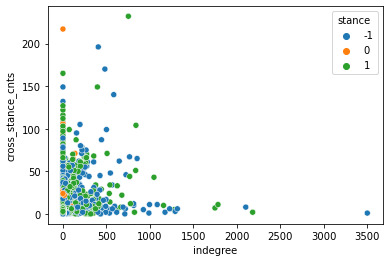

In [ ]:
sns.scatterplot(data=users2, x="indegree", y="cross_stance_cnts", hue="stance",palette="tab10")

In [ ]:
corr, p = stats.spearmanr(users2['indegree'],users2['cross_stance_cnts'])
print(corr)
print(p)

0.18510461959715335
6.981741699065499e-74


/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='indegree', ylabel='cross_stance_cnts'>

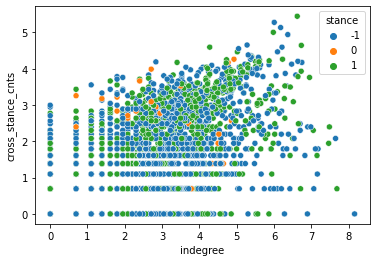

In [ ]:
sns.scatterplot(np.log(users2['indegree']),np.log(users2['cross_stance_cnts']), hue=users2['stance'],palette="tab10")

In [ ]:
corr, p = stats.spearmanr(np.log(users2['indegree']),np.log(users2['cross_stance_cnts']))
print(corr)
print(p)

0.18510461959715335
6.981741699065499e-74


/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
users2.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree,community,cross_edges,stance,cross_stance_cnts
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093,6,1,0,-1,0
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663,17,1,2,-1,5
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355,42,1,2,-1,4
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269,0,2,6,-1,5
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835,0,2,25,1,27


In [ ]:
users2.to_csv('user_degree.csv',index=False)

In [ ]:
import pandas as pd

users = pd.read_csv('user_degree.csv')
users.head()

,username,id,clean_following,following_count,avg_leaning,following leaning,indegree,community,cross_edges,stance,cross_stance_cnts
0,1980srock,7.188956e+17,"['tweettruth2me', 'bennyjohnson', 'stillgray',...",8,-0.377271,-0.288093,6,1,0,-1,0
1,marylou_quayle,7.556195e+17,"['stillgray', 'mtracey', 'caitoz', 'cat_barnes...",20,-0.805080,-0.264663,17,1,2,-1,5
2,hemingquay,7.876231e+08,"['prolifejewess', 'just_mindy', 'davidharsanyi...",14,-0.163700,-0.334355,42,1,2,-1,4
3,Vandalay_Inc,8.279382e+17,"['kittysundae', 'academic_la', 'thedailybeast'...",13,-0.480517,-0.108269,0,2,6,-1,5
4,DTorstensond,1.293988e+18,"['nycforabortion', 'taliaotg', 'ybarrap', 'nan...",60,0.531656,0.098835,0,2,25,1,27


In [ ]:
users['stance'].value_counts()

-1    6510
 1    2835
 0     141
Name: stance, dtype: int64

In [ ]:
len(users)

9486